In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import copy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from feature_util import *
from utils import *



# Principal Component Analysis of the Key Feature Points

In [2]:
#import images, remove jokers and reset the index
data_path = 'Dataset/'
image_csv = pd.read_csv('Dataset/cards.csv')
image_csv = image_csv[image_csv['labels'] != 'joker']
image_csv = image_csv.reset_index(drop=True)
image_csv[:-10]

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train
...,...,...,...,...,...
8014,50,valid/two of diamonds/1.jpg,two of diamonds,two,valid
8015,50,valid/two of diamonds/2.jpg,two of diamonds,two,valid
8016,50,valid/two of diamonds/3.jpg,two of diamonds,two,valid
8017,50,valid/two of diamonds/4.jpg,two of diamonds,two,valid


In [3]:
#adjusting the dataframe to include the labels for the suit
suit_label = []
for label in image_csv['labels']:
    if 'clubs' in label:
        suit_label.append(0)
    elif 'diamonds' in label:
        suit_label.append(1)
    elif 'hearts' in label:
        suit_label.append(2)
    elif 'spades' in label:
        suit_label.append(3)

image_csv['Suit_Label'] = suit_label
image_csv[:-10]

,class index,filepaths,labels,card type,data set,Suit_Label
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train,0
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train,0
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train,0
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train,0
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train,0
...,...,...,...,...,...,...
8014,50,valid/two of diamonds/1.jpg,two of diamonds,two,valid,1
8015,50,valid/two of diamonds/2.jpg,two of diamonds,two,valid,1
8016,50,valid/two of diamonds/3.jpg,two of diamonds,two,valid,1
8017,50,valid/two of diamonds/4.jpg,two of diamonds,two,valid,1


In [4]:
#creating a dataframe of the strongest 15 features

im_paths = image_csv['filepaths']

feature_info = strongest_features(image_csv, im_paths, 15)

print(len(feature_info[0]))
print('-------')
print(len(feature_info[1]))
print('-------')
print(len(feature_info[2]))

8029
-------
8029
-------
8029


In [5]:
#creating the keypoint feature dataframe
features_df = pd.DataFrame(feature_info[0])
features_df = features_df.dropna(axis=1)
features_df.insert(loc=0, column = 'Suite_Label', value = feature_info[1])
features_df

,Suite_Label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,243,242,242,245,40,244,244,35,35,40,40,250,250,244,244
1,0,246,246,247,6,246,246,246,246,249,249,250,246,251,250,250
2,0,255,252,255,255,255,255,0,255,255,25,255,255,255,255,255
3,0,5,5,5,5,213,6,6,205,210,12,12,19,209,210,208
4,0,208,208,77,77,146,146,214,228,24,24,192,192,207,207,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8024,3,233,233,233,233,241,10,229,10,10,229,241,8,8,243,232
8025,3,252,252,253,255,255,255,253,253,82,235,34,235,82,12,30
8026,3,225,243,230,240,229,190,203,200,31,175,202,182,15,15,185
8027,3,245,241,245,245,247,247,247,67,244,247,243,10,242,11,11


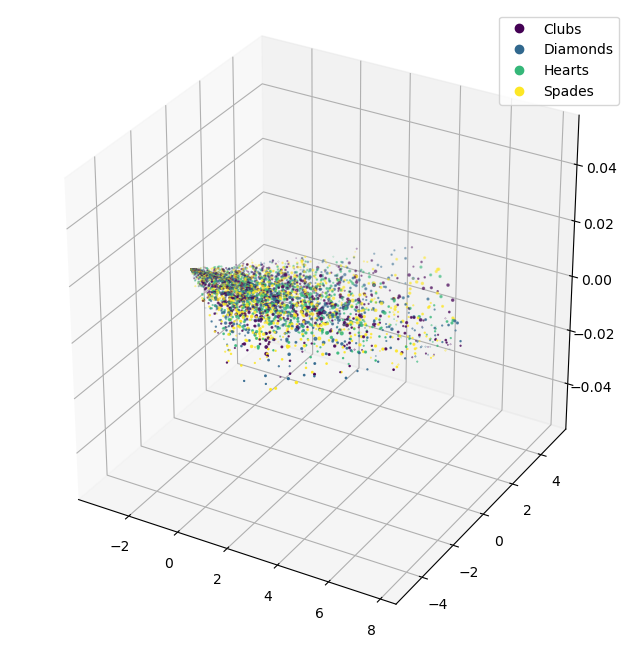

In [6]:
#From the results we can see that using only 3 feature points is not enough to see the variation between the different classes
import warnings
warnings.filterwarnings('ignore')

#PCA Plots for first 3 features
features = features_df.iloc[:, 1:]
labels = features_df.iloc[:, 0]
X_features = StandardScaler().fit_transform(features)
pca_calc = PCA(n_components = 3)
X_features_pca = pca_calc.fit_transform(X_features)

#display the 3d PCA plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=(1, 1, 1))
plot = plt.scatter(X_features_pca[:,0], X_features_pca[:,1], X_features_pca[:,2], c=labels)
plt.legend(handles=plot.legend_elements()[0], labels=['Clubs','Diamonds','Hearts','Spades'])
plt.show()

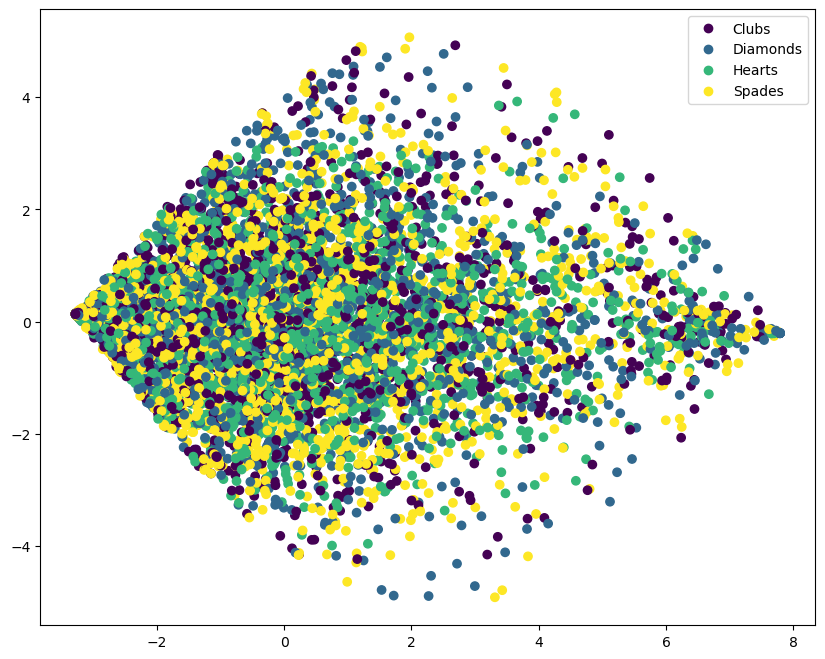

In [7]:
#display 2d PCA plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
plot = plt.scatter(X_features_pca[:,0], X_features_pca[:,1], c=labels)
plt.legend(handles=plot.legend_elements()[0], labels=['Clubs','Diamonds','Hearts','Spades'])
plt.show()

In [11]:
pca = PCA()
keypoints_features = pca.fit_transform(X_features)

kp_explained_variance = pca.explained_variance_ratio_
kp_cumulative_explained_variance = np.cumsum(kp_explained_variance)

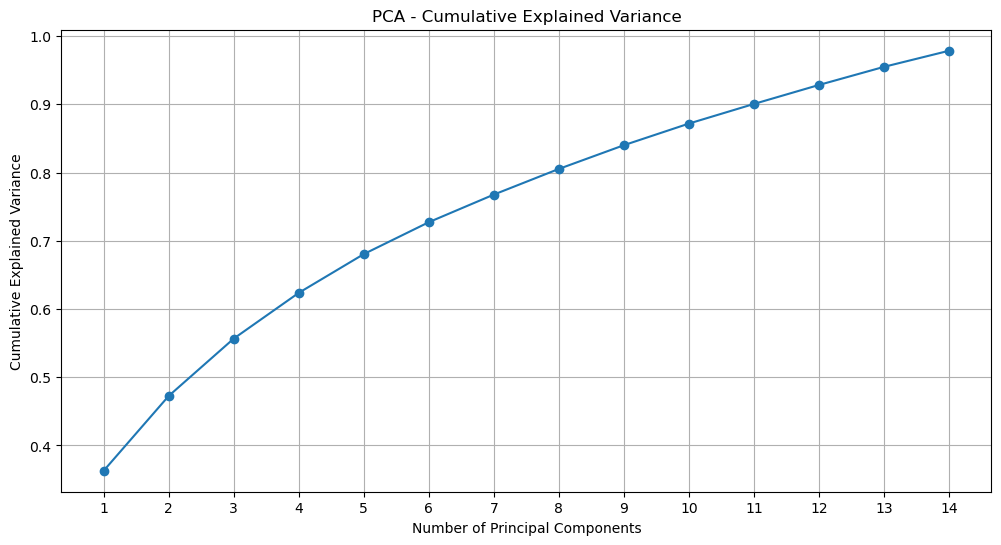

In [12]:
components_range = np.arange(1, 15)

plt.figure(figsize=(12, 6))
plt.plot(components_range, kp_cumulative_explained_variance[components_range - 1], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.xticks(components_range)
plt.grid(True)
plt.show()